[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2484 non-null   int64 
 1   Resume_str      2484 non-null   object
 2   Resume_html     2484 non-null   object
 3   Category        2484 non-null   object
 4   Cleaned_Resume  2483 non-null   object
dtypes: int64(1), object(4)
memory usage: 97.2+ KB
None
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS       

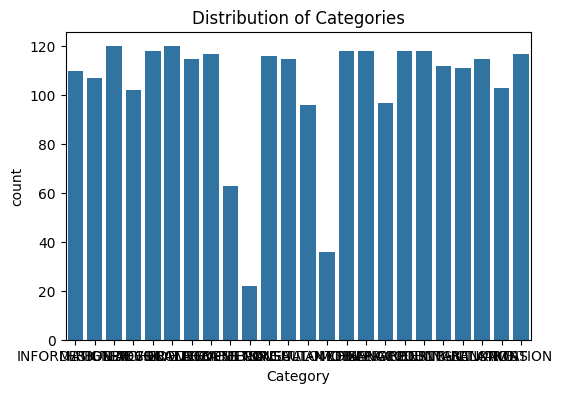

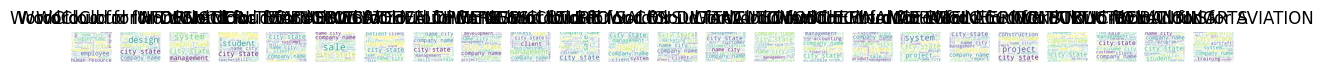

Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.83      0.86      0.85        29
              ADVOCATE       0.53      0.60      0.56        30
           AGRICULTURE       1.00      0.12      0.22         8
               APPAREL       0.53      0.45      0.49        20
                  ARTS       0.11      0.11      0.11        18
            AUTOMOBILE       1.00      0.17      0.29         6
              AVIATION       0.78      0.86      0.82        21
               BANKING       0.75      0.65      0.70        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.89      0.59      0.71        27
                  CHEF       0.85      0.71      0.77        24
          CONSTRUCTION       0.90      0.76      0.83        34
            CONSULTANT       0.46      0.30      0.36        20
              DESIGNER       0.71      0.79      0.75        19
         DIGITA

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('stopwords')

df = pd.read_csv('/content/cleaned_resumes.csv')  # Adjust path and filename

print(df.info())
print(df['Category'].value_counts())  # Check labels distribution

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation & numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply cleaning on 'Resume_str' column or 'Cleaned_Resume' if available
df['cleaned_text'] = df['Resume_str'].apply(clean_text)

plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=df)
plt.title('Distribution of Categories')
plt.show()

categories = df['Category'].unique()
plt.figure(figsize=(15, 7))
for i, cat in enumerate(categories):
    plt.subplot(1, len(categories), i+1)
    text = ' '.join(df[df['Category'] == cat]['cleaned_text'])
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate(text)
    plt.imshow(wordcloud)
    plt.title(f'WordCloud for {cat}')
    plt.axis('off')
plt.show()


vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



